In [1]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:

ruta_datos = './data'
archivos = [archivo for archivo in os.listdir(ruta_datos) if archivo.endswith('.csv')]

datos_cripto = {}
for archivo in archivos:
    nombre_moneda = archivo.split('.')[0].lower()
    try:
        df = pd.read_csv(os.path.join(ruta_datos, archivo))
        mapa_renombrar = {'Date': 'Fecha', 'date': 'Fecha', 'Timestamp': 'Fecha', 'fecha': 'Fecha',
                          'price': 'Precio', 'total_volume': 'Volumen', 'market_cap': 'Capitalizacion'}
        df.rename(columns={k: v for k, v in mapa_renombrar.items() if k in df.columns}, inplace=True)
        if 'Fecha' in df.columns:
            df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
        if 'Precio' in df.columns:
            df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
        if 'Volumen' in df.columns:
            df['Volumen'] = pd.to_numeric(df['Volumen'], errors='coerce')
        if 'Capitalizacion' in df.columns:
            df['Capitalizacion'] = pd.to_numeric(df['Capitalizacion'], errors='coerce')
        df.dropna(subset=['Fecha', 'Precio'], inplace=True)
        datos_cripto[nombre_moneda] = df
    except Exception as e:
        print(f"Error al procesar {archivo}: {e}")


In [3]:

estadisticas_cripto = {}
for moneda, df in datos_cripto.items():
    df_2015 = df[df['Fecha'].dt.year == 2015]
    media_precio = df_2015['Precio'].mean()
    desviacion_precio = df_2015['Precio'].std()
    estadisticas_cripto[moneda] = {'media': media_precio, 'desviacion': desviacion_precio}


In [4]:

def mostrar_estadisticas(nombre_moneda):
    df = datos_cripto.get(nombre_moneda)
    if df is not None:
        print(f"\nEstadísticas de {nombre_moneda.capitalize()}:")
        print(df.describe(), "\n")
    else:
        print(f"\nCriptomoneda {nombre_moneda} no encontrada.\n")


In [5]:

def ver_grafica(nombre_moneda):
    df = datos_cripto.get(nombre_moneda)
    if df is not None:
        plt.figure(figsize=(10, 6))
        plt.plot(df['Fecha'], df['Precio'], label=nombre_moneda.capitalize())
        plt.title(f'Evolución del precio de {nombre_moneda.capitalize()}')
        plt.xlabel('Fecha')
        plt.ylabel('Precio (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"\nCriptomoneda {nombre_moneda} no encontrada.\n")


In [6]:

def grafica_relevantes():
    relevantes = ['bitcoin', 'ethereum', 'dogecoin', 'litecoin']
    plt.figure(figsize=(10, 6))
    for moneda in relevantes:
        if moneda in datos_cripto:
            df = datos_cripto[moneda]
            df_2015 = df[df['Fecha'].dt.year == 2015]
            plt.plot(df_2015['Fecha'], df_2015['Precio'], label=moneda.capitalize())
    plt.title('Evolución de precios de las criptomonedas más relevantes en 2015')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:

def verificar_estabilidad(nombre_moneda):
    estadisticas = estadisticas_cripto.get(nombre_moneda)
    if estadisticas:
        desviacion_total = np.mean([stat['desviacion'] for stat in estadisticas_cripto.values()])
        if estadisticas['desviacion'] < desviacion_total:
            print(
                f"\n{nombre_moneda.capitalize()} fue estable en 2015 (Desviación estándar: {estadisticas['desviacion']:.2f}).\n")
        else:
            print(
                f"\n{nombre_moneda.capitalize()} no fue estable en 2015 (Desviación estándar: {estadisticas['desviacion']:.2f}).\n")
    else:
        print(f"\nCriptomoneda {nombre_moneda} no encontrada.\n")


In [8]:

def criptos_por_encima_media():
    media_global = np.mean([stat['media'] for stat in estadisticas_cripto.values()])

    if np.isnan(media_global):
        print("\nNo se encontró ninguna criptomoneda por encima de la media en 2015.\n")
        return

    print(f"\nCriptomonedas por encima de la media ({media_global:.2f} USD) en 2015:")

    encontrada = False
    for moneda, estadisticas in sorted(estadisticas_cripto.items(), key=lambda x: x[1]['media'], reverse=True):
        if estadisticas['media'] > media_global:
            print(f"{moneda.capitalize()} - Media: {estadisticas['media']:.2f}")
            encontrada = True

    if not encontrada:
        print("No se encontró ninguna criptomoneda por encima de la media en 2015.")


In [11]:

def mostrar_menu():
    opciones = {
        '1': "Ingresar nombre de la criptomoneda",
        '2': "Ver gráfica de la criptomoneda",
        '3': "Gráfica de las 4 criptomonedas más relevantes en 2015",
        '4': "Verificar estabilidad de una criptomoneda en 2015",
        '5': "Criptomonedas por encima de la media en 2015",
        '6': "Salir"
    }
    print("\n--- Menú Principal ---")
    for clave, descripcion in opciones.items():
        print(f"{clave}. {descripcion}")
    return input("Seleccione una opción: ")



--- Menú Principal ---
1. Ingresar nombre de la criptomoneda
2. Ver gráfica de la criptomoneda
3. Gráfica de las 4 criptomonedas más relevantes en 2015
4. Verificar estabilidad de una criptomoneda en 2015
5. Criptomonedas por encima de la media en 2015
6. Salir


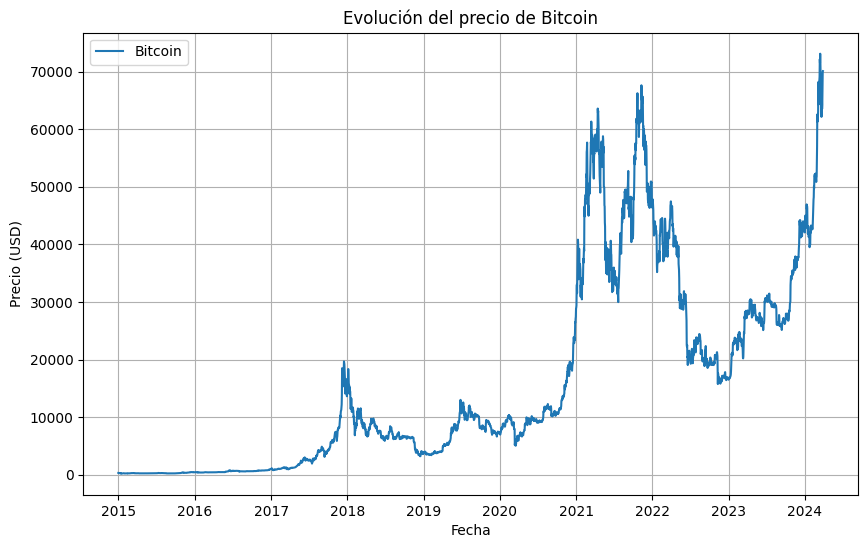


--- Menú Principal ---
1. Ingresar nombre de la criptomoneda
2. Ver gráfica de la criptomoneda
3. Gráfica de las 4 criptomonedas más relevantes en 2015
4. Verificar estabilidad de una criptomoneda en 2015
5. Criptomonedas por encima de la media en 2015
6. Salir


KeyboardInterrupt: Interrupted by user

In [19]:
while True:
        opcion = mostrar_menu()
        if opcion == '1':
            nombre_moneda = input("Ingrese el nombre de la criptomoneda: ").lower()
            mostrar_estadisticas(nombre_moneda)
        elif opcion == '2':
            nombre_moneda = input("Ingrese el nombre de la criptomoneda: ").lower()
            ver_grafica(nombre_moneda)
        elif opcion == '3':
            grafica_relevantes()
        elif opcion == '4':
            nombre_moneda = input("Ingrese el nombre de la criptomoneda: ").lower()
            verificar_estabilidad(nombre_moneda)
        elif opcion == '5':
            criptos_por_encima_media()
        elif opcion == '6':
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Intente de nuevo.")

